# Standford dogs dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import re
from keras.utils import to_categorical
from skimage import transform
import cv2

Using TensorFlow backend.


In [3]:
images_dir = "../datasets/stanford-dogs-dataset/images"

In [4]:
os.listdir(os.path.join(images_dir, os.listdir(images_dir)[0]))

['n02097658_26.jpg',
 'n02097658_4869.jpg',
 'n02097658_595.jpg',
 'n02097658_9222.jpg',
 'n02097658_422.jpg',
 'n02097658_1326.jpg',
 'n02097658_7970.jpg',
 'n02097658_10567.jpg',
 'n02097658_1469.jpg',
 'n02097658_1086.jpg',
 'n02097658_1910.jpg',
 'n02097658_5223.jpg',
 'n02097658_2766.jpg',
 'n02097658_3693.jpg',
 'n02097658_10997.jpg',
 'n02097658_10559.jpg',
 'n02097658_11242.jpg',
 'n02097658_3484.jpg',
 'n02097658_7619.jpg',
 'n02097658_4890.jpg',
 'n02097658_1917.jpg',
 'n02097658_4728.jpg',
 'n02097658_1693.jpg',
 'n02097658_2173.jpg',
 'n02097658_11118.jpg',
 'n02097658_6300.jpg',
 'n02097658_633.jpg',
 'n02097658_141.jpg',
 'n02097658_1137.jpg',
 'n02097658_237.jpg',
 'n02097658_2012.jpg',
 'n02097658_6289.jpg',
 'n02097658_427.jpg',
 'n02097658_6672.jpg',
 'n02097658_1690.jpg',
 'n02097658_7785.jpg',
 'n02097658_816.jpg',
 'n02097658_2824.jpg',
 'n02097658_5420.jpg',
 'n02097658_552.jpg',
 'n02097658_7425.jpg',
 'n02097658_10854.jpg',
 'n02097658_6.jpg',
 'n02097658_4201.j

In [5]:
classes = []
images = []

for directory in os.listdir(images_dir):
    if directory != ".DS_Store":
        dog_class = "".join(directory.split("-")[1:])
        dog_class = re.sub(pattern=r'[_-]', repl=" ", string=dog_class)
        dog_class = dog_class.lower()

        for image in os.listdir(os.path.join(images_dir, directory)):
            images.append(os.path.join(images_dir, directory, image))
            classes.append(dog_class)

In [6]:
len(classes), len(images)

(20580, 20580)

In [7]:
data = pd.DataFrame()
data["image"] = [cv2.imread(x) for x in images]
data["class"] = classes
data.head()

,image,class
0,"[[[226, 217, 213], [226, 217, 213], [226, 217,...",silky terrier
1,"[[[251, 251, 197], [251, 251, 197], [251, 251,...",silky terrier
2,"[[[198, 184, 166], [202, 188, 170], [214, 200,...",silky terrier
3,"[[[115, 127, 137], [116, 128, 138], [114, 128,...",silky terrier
4,"[[[20, 103, 88], [21, 104, 89], [22, 105, 90],...",silky terrier


In [20]:
data.to_csv("../datasets/stanford-dogs-dataset/standford-dogs.csv")

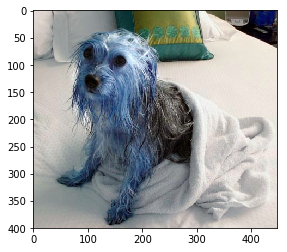

In [8]:
plt.imshow(data["image"][0])

In [9]:
data["image"] = [cv2.cvtColor(x, cv2.COLOR_BGR2RGB) for x in data["image"]]

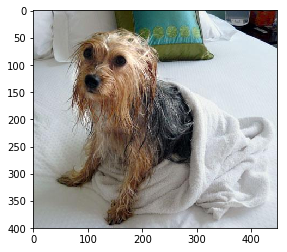

In [10]:
plt.imshow(data["image"][0])

In [72]:
max_width = 0
max_height = 0

min_width = 99999
min_height = 99999

for image in data["image"]:
    if image.shape[0] < min_height:
        min_height = image.shape[0]
    if image.shape[1] < min_width:
        min_width = image.shape[1]
    if image.shape[0] > max_height:
        max_height = image.shape[0]
    if image.shape[1] > max_width:
        max_width = image.shape[1]
        
print("Max dimension: {}x{}".format(max_height, max_width))
print("Min dimension: {}x{}".format(min_height, min_width))

Max dimension: 2562x3264
Min dimension: 100x97


In [11]:
x_data = data["image"]
target = np.array(data["class"])

x_data.shape, target.shape

((20580,), (20580,))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_data, target, test_size=0.2, random_state=101)

In [ ]:
x_train = np.array([cv2.resize(x, (100,100)) for x in x_train])
x_test = np.array([cv2.resize(x, (100,100)) for x in x_test])

In [ ]:
x_train.shape, x_test.shape

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)